#Value Iteration

In [ ]:
import numpy as np

Etat=['s1','s2','s3','s4']
Recompense=np.array([[-1,0,0,-1],[0,-1,-0.5,-1],[-1,0,-1,0],[1,1,1,1]]) # gauche, droite, bas, haut
Transition=np.array([['s1','s2','s3','s1'],['s1','s2','s4','s2'],['s3','s4','s3','s1'],['s1','s1','s1','s1']])
Vs={}
Vs['s1']=0
Vs['s2']=0
Vs['s3']=0
Vs['s4']=0

gamma=float(input("La valeur de Gamma : "))
Q=np.zeros(4)

for j in range(10):
    #print("Itération "+str(j+1))
    for i in range(len(Etat)):
        for k in range(len(Transition[i])):
            Q[k]=Recompense[i][k]+gamma*Vs[Transition[i][k]]
        Vs[Etat[i]]=max(Q)
        
print(Vs)

pi={}
for i in range(len(Etat)):
    Meilleur=0
    MeilleurEtat=""
    for k in Transition[i]:
        if Vs[k]>Meilleur:
            Meilleur=Vs[k]
            MeilleurEtat=k
    pi[Etat[i]]=MeilleurEtat
    print("A partir de", Etat[i],"il faut aller à", MeilleurEtat)
    
print(pi)

La valeur de Gamma : 0.8
{'s1': 1.2213515059200004, 's2': 1.0816649637888003, 's3': 1.5816649637888003, 's4': 1.9770812047360002}
A partir de s1 il faut aller à s3
A partir de s2 il faut aller à s4
A partir de s3 il faut aller à s4
A partir de s4 il faut aller à s1
{'s1': 's3', 's2': 's4', 's3': 's4', 's4': 's1'}


#Q-learning

In [ ]:
import numpy as np
import random

Gamma=0.9
Alpha=0.2

nbetape=5 ########## A CHANGER ########## pour améliorer l'IA, 50 par exemple
Epsilon=np.linspace(0.95,0.05,nbetape)

Horizontale=3
Verticale=3
GridWorld=np.zeros((Verticale,Horizontale))

#Gridword[i][j] avec i+1 aller en bas et j+1 aller à droite et inversement
GridWorld[0][Horizontale-1]=1
GridWorld[1][1]=-1
#depart i=Verticale-1 j=0

Q=[]
Temporaire=[]
for i in range(Horizontale):
    Temporaire.append([0,0,0,0])
for i in range(Verticale):
    Q.append(Temporaire.copy())

#Action 0:haut 1:bas 2:gauche 3:droite
AZ=['haut','bas','gauche','droite']
Q=np.zeros((3,3,4))

Visualisation=GridWorld.copy()

for k in range(nbetape):
    i,j=Verticale-1,0
    while [i,j]!=[0,Horizontale-1]:
        i2,j2=i,j
        ### CHOIX DE L'ACTION ###
        if Epsilon[k]<random.random():
            Action=np.argmax(Q[i][j])
        else:
            Action=random.choice([0,1,2,3]) 
        ### AFFICHAGE ###
        Visualisation=GridWorld.copy()
        Visualisation[i][j]=8
        print(Visualisation,AZ[Action],Q[i][j],k,"\n\n")
        ### MOUVEMENT ###
        if Action==0:
            if 0<=i-1<Verticale:
                R=GridWorld[i-1][j]
                i-=1
            else:
                R=GridWorld[i][j]
        if Action==1:
            try:
                R=GridWorld[i+1][j]
                i+=1
            except:
                R=GridWorld[i][j]
        if Action==2:
            if 0<=j-1<Horizontale:
                R=GridWorld[i][j-1]
                j-=1
            else:
                R=GridWorld[i][j]
        if Action==3:
            try:
                R=GridWorld[i][j+1]
                j+=1
            except:
                R=GridWorld[i][j]
        ### APPRENTISSAGE ####
        Q[i2][j2][Action]=(1-Alpha)*Q[i2][j2][Action]+Alpha*(R+Gamma*max(Q[i][j]))

[[ 0.  0.  1.]
 [ 0. -1.  0.]
 [ 8.  0.  0.]] droite [0. 0. 0. 0.] 0 


[[ 0.  0.  1.]
 [ 0. -1.  0.]
 [ 0.  8.  0.]] gauche [0. 0. 0. 0.] 0 


[[ 0.  0.  1.]
 [ 0. -1.  0.]
 [ 8.  0.  0.]] gauche [0. 0. 0. 0.] 0 


[[ 0.  0.  1.]
 [ 0. -1.  0.]
 [ 8.  0.  0.]] droite [0. 0. 0. 0.] 0 


[[ 0.  0.  1.]
 [ 0. -1.  0.]
 [ 0.  8.  0.]] haut [0. 0. 0. 0.] 0 


[[0. 0. 1.]
 [0. 8. 0.]
 [0. 0. 0.]] bas [0. 0. 0. 0.] 0 


[[ 0.  0.  1.]
 [ 0. -1.  0.]
 [ 0.  8.  0.]] bas [-0.2  0.   0.   0. ] 0 


[[ 0.  0.  1.]
 [ 0. -1.  0.]
 [ 0.  8.  0.]] droite [-0.2  0.   0.   0. ] 0 


[[ 0.  0.  1.]
 [ 0. -1.  0.]
 [ 0.  0.  8.]] bas [0. 0. 0. 0.] 0 


[[ 0.  0.  1.]
 [ 0. -1.  0.]
 [ 0.  0.  8.]] gauche [0. 0. 0. 0.] 0 


[[ 0.  0.  1.]
 [ 0. -1.  0.]
 [ 0.  8.  0.]] haut [-0.2  0.   0.   0. ] 0 


[[0. 0. 1.]
 [0. 8. 0.]
 [0. 0. 0.]] haut [0. 0. 0. 0.] 0 


[[ 0.  8.  1.]
 [ 0. -1.  0.]
 [ 0.  0.  0.]] droite [0. 0. 0. 0.] 0 


[[ 0.  0.  1.]
 [ 0. -1.  0.]
 [ 8.  0.  0.]] haut [0. 0. 0. 0.] 1 


[[ 

#Convolution

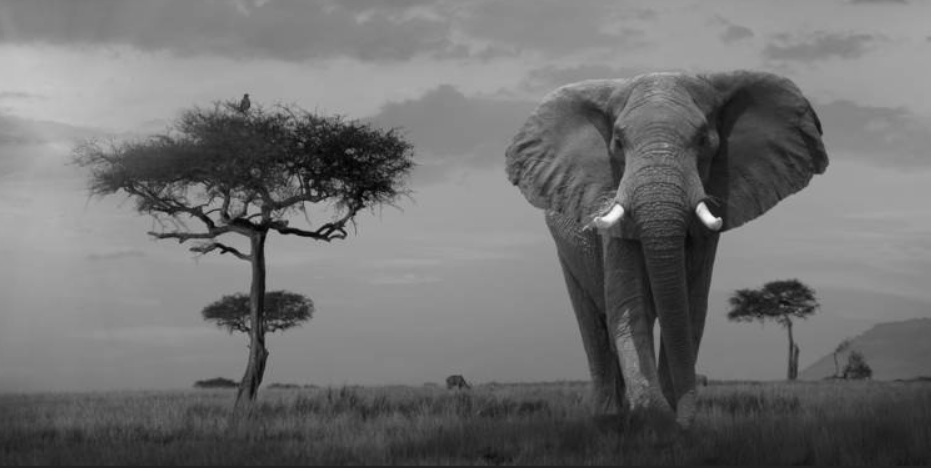



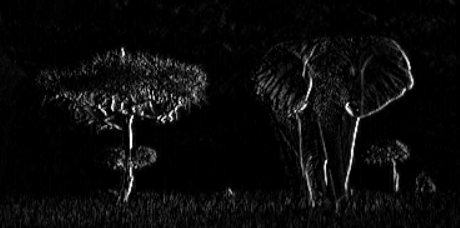

Il faut le copier coller dans l'ide python

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Charger l'image
img = Image.open("Image/elephant.jpg")
img = img.convert('L') 

# Afficher l'image chargée
img.show()

# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat = np.array(img)
# mat=np.insert(mat,0,0,axis=1)
# mat=np.insert(mat,0,0,axis=0)
# mat=np.insert(mat,len(mat[0]),0,axis=1)
# mat=np.insert(mat,len(mat),0,axis=0)
print(mat)

def pasdingue(matrice):
    matrice=np.insert(matrice,0,0,axis=1)
    matrice=np.insert(matrice,0,0,axis=0)
    matrice=np.insert(matrice,len(matrice[0]),0,axis=1)
    matrice=np.insert(matrice,len(matrice),0,axis=0)
    return matrice


def convolution(matrice,filtre):
    Matconv=np.zeros([matrice.shape[0]-2,matrice.shape[1]-2])
    for i in range(1,len(matrice)-1):
        for j in range(1,len(matrice[0])-1):
            valeur=matrice[i-1][j-1]*filtre[0][0]+matrice[i][j-1]*filtre[1][0]+matrice[i][j]*filtre[1][1]+matrice[i-1][j]*filtre[0][1]+matrice[i+1][j-1]*filtre[2][0]+matrice[i+1][j+1]*filtre[2][2]+matrice[i-1][j+1]*filtre[0][2]+matrice[i][j+1]*filtre[1][2]+matrice[i+1][j]*filtre[2][1]
            Matconv[i-1][j-1]=valeur
    return Matconv

def ReLu(matrice):
    for i in range(len(matrice)):
        for j in range(len(matrice[0])):
            if matrice[i][j]<0:
                matrice[i][j]=0
    return matrice

def ReLou(x):
    return (x > 0) * x

def poule(matrice):
    x=[]
    if matrice.shape[0]%2==1:
        matrice=np.insert(matrice,0,0,axis=0)
    if matrice.shape[1]%2==1:
        matrice=np.insert(matrice,0,0,axis=1)
    Matpoule=np.zeros([matrice.shape[0]//2,matrice.shape[1]//2])
    for i in range(0,len(matrice),2):
        for j in range(0,len(matrice[0]),2):
            x.append(matrice[i,j])
            x.append(matrice[i+1,j])
            x.append(matrice[i,j+1])
            x.append(matrice[i+1,j+1])
            Matpoule[i//2,j//2]=max(x)
            x=[]
    return Matpoule
            
filtre1=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
filtre2=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

filtre3=np.array([[-1,-1,-1],[-1,16,-1],[-1,-1,-1]])/8

# filtre1=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
# filtre2=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

test=poule(ReLou(convolution(mat,filtre1)))
test2=poule(ReLou(convolution(mat,filtre2)))

test1=Image.fromarray(test)
test1.show()

test3=Image.fromarray(test2)
test3.show()

Si vous voulez jouer au jeu du baton contre une IA

( Vous perdrez toujours si nb_baton = 1 [4] )

---



In [ ]:
import numpy as np
import random

nb_baton = 26
   
petit, grand = nb_baton, nb_baton

nbetape=10000  
Epsilon=np.linspace(0.99,0.05,nbetape) 
Etat=np.zeros(grand)

def JeuDuBaton(IA):        
    JeuBaton = random.randint(petit,grand)
    while JeuBaton>0:
        x=""
        for i in range(JeuBaton):
            x+="|"
        print(x, JeuBaton)
        a=int(input("Nombre de baton : "))
        while a>3 or a<0:
            print("Entre 1, 2 et 3")
            a=int(input("Nombre de baton : "))
        JeuBaton-=a
        if JeuBaton<=0:
            print("Perdu")
            break
        x=""
        for i in range(JeuBaton):
            x+="|"
        if not IA:
            Ordi=random.randint(1,3)
        else:
            Ordi=choix(0,JeuBaton)
        print("L'ordinateur prend",Ordi,"baton(s)")
        JeuBaton-=Ordi
        if JeuBaton<=0:
            print("Gagné")
    
def Renforcement(etape):
    JeuBaton = random.randint(petit,grand)
    Historique=np.zeros(JeuBaton)
    while JeuBaton>0:
        Historique[JeuBaton-1]=1
        a=choix(Epsilon[etape],JeuBaton)
        JeuBaton-=a
        if JeuBaton<=0:
            return -1, Historique
        Historique[JeuBaton-1]=2
        Ordi=choix(Epsilon[etape],JeuBaton)
        JeuBaton-=Ordi
        if JeuBaton<=0:
            return -2, Historique
                   
        
def choix(epsilon,etat):
    if epsilon<random.random():
        a=max(etat-4,0)
        if etat-1==0:
            return 1
        return len(Etat[a:etat-1])-np.argmin(Etat[a:etat-1])
    return random.randint(1,3)
            
def entrainement():
    for k in range(nbetape):
        A=Renforcement(k)
        if A[0]==-1:
            R=-1
            D=1
        else:
            R=1
            D=-1
        for i in range(len(A[1])):
            if A[1][i]==1:
                Etat[i]=Etat[i]+0.1*(R-Etat[i])
                R=Etat[i]
            if A[1][i]==2:
                Etat[i]=Etat[i]+0.1*(D-Etat[i])
                D=Etat[i]      

entrainement()

JeuDuBaton(True)

|||||||||||||||||||||||||| 26
Nombre de baton : 1
L'ordinateur prend 1 baton(s)
|||||||||||||||||||||||| 24
Nombre de baton : 3
L'ordinateur prend 1 baton(s)
|||||||||||||||||||| 20
Nombre de baton : 3
L'ordinateur prend 2 baton(s)
||||||||||||||| 15
Nombre de baton : 2
L'ordinateur prend 1 baton(s)
|||||||||||| 12
Nombre de baton : 3
L'ordinateur prend 2 baton(s)
||||||| 7
Nombre de baton : 2
L'ordinateur prend 1 baton(s)
|||| 4
Nombre de baton : 3
L'ordinateur prend 1 baton(s)
Gagné
